In [2]:
from data_handler import DataHandler

loaded_df = DataHandler.load_data("./data/df_video_stats.pkl", "pickle")

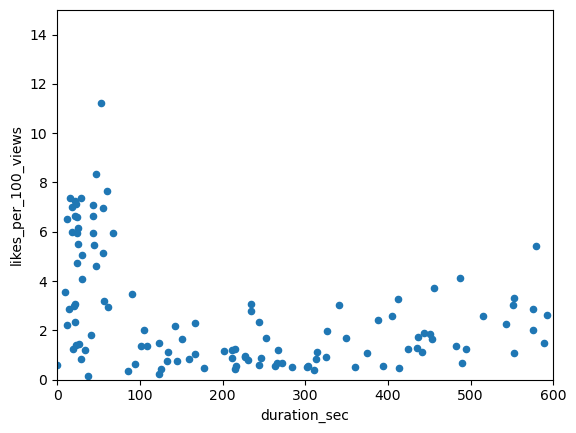

In [4]:
from data_processor import DataProcessor
import pandas as pd

def plot_likes_with_duration(dataframe):
    df = DataProcessor.process_dataframe(dataframe)

    df['view_count'] = pd.to_numeric(df['view_count'], errors='coerce')
    df['like_count'] = pd.to_numeric(df['like_count'], errors='coerce')
    df = df.dropna(subset=['view_count'])
    df = df.dropna(subset=['like_count'])

    sample1 = df[df['duration_sec'] <= 60].sample(n=40, random_state=1) 
    sample2 = df[(df['duration_sec'] > 60) & (df['duration_sec'] <= 300)].sample(n=40, random_state=1)
    sample3 = df[(df['duration_sec'] > 300) & (df['duration_sec'] <= 600)].sample(n=40, random_state=1)
    combined_sample = pd.concat([sample1, sample2, sample3])

    combined_sample['likes_per_100_views'] = combined_sample['like_count'] / combined_sample['view_count'] * 100

    combined_sample.plot(x='duration_sec', y='likes_per_100_views', kind='scatter', xlim=(0, 600), ylim=(0, 15))

plot_likes_with_duration(loaded_df)

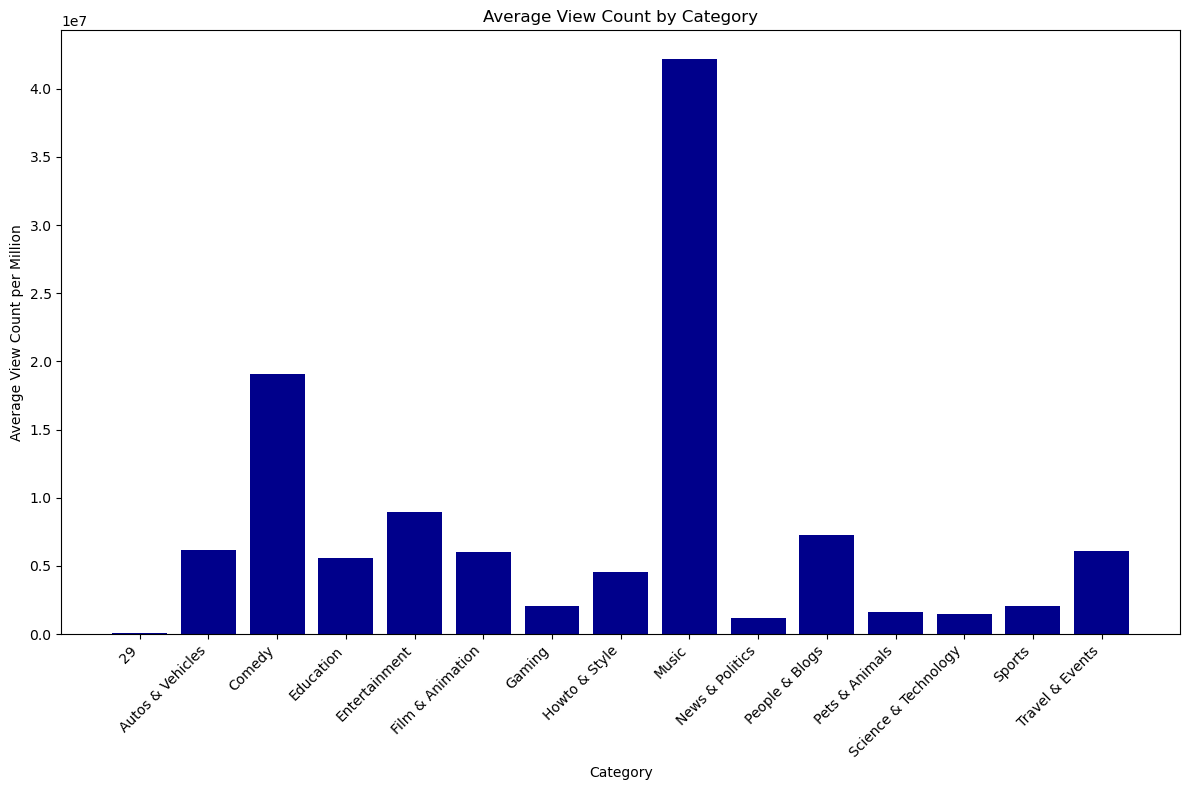

In [6]:
def plot_avg_view_count_by_category(dataframe):
    df = DataProcessor.process_dataframe(dataframe)
    df['view_count'] = pd.to_numeric(df['view_count'], errors='coerce')
    df = df.dropna(subset=['view_count'])
    
    df = df.groupby('category')['view_count'].agg(mean='mean').reset_index()
    plt.figure(figsize=(12, 8))
    plt.bar(df['category'], df['mean'], color='darkblue') 
   
    plt.xlabel('Category') 
    plt.ylabel('Average View Count per Million')
    plt.title('Average View Count by Category')
 
    plt.xticks(rotation=45, ha='right') 
  
    plt.tight_layout()
    plt.show()
    
plot_avg_view_count_by_category(loaded_df)

C:\Users\User\AppData\Local\Temp\ipykernel_2524\3227246855.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_date'] = pd.to_datetime(df['published_year'].astype(str) + '-' + df['published_month'].astype(str))


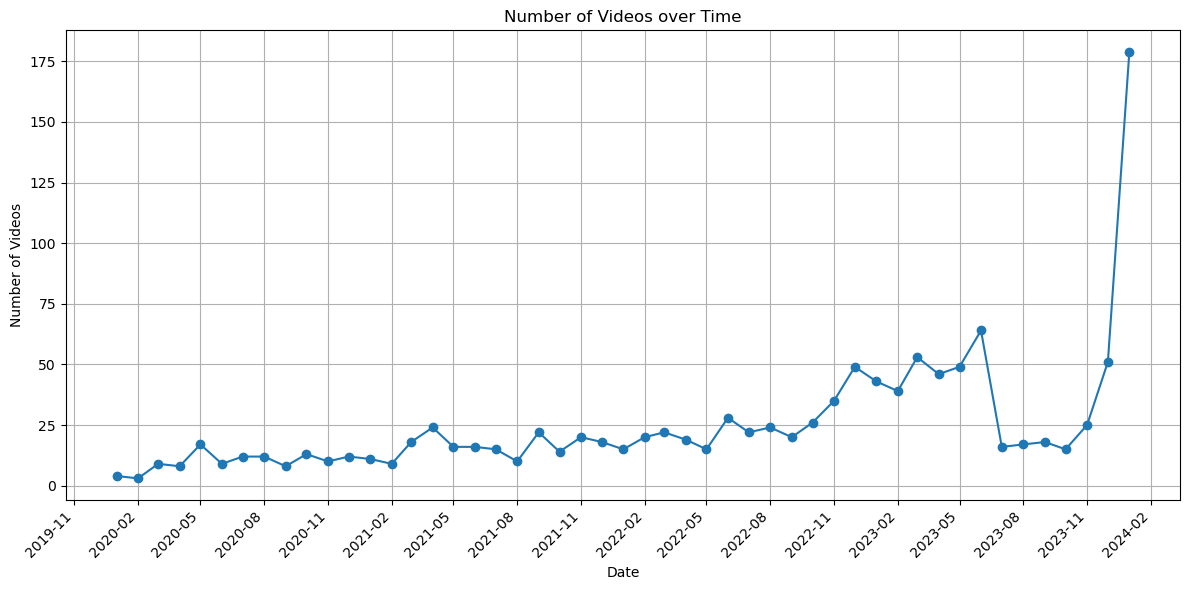

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_video_count_over_time(dataframe):
    df = DataProcessor.process_dataframe(dataframe)
    df = df[(df['published_year'] >= 2020) & (df['published_year'] <= 2024)]
    df['published_date'] = pd.to_datetime(df['published_year'].astype(str) + '-' + df['published_month'].astype(str))
    df = df.sort_values('published_date')

    video_count_per_date = df.groupby('published_date').size()

    plt.figure(figsize=(12, 6))
    plt.plot(video_count_per_date.index, video_count_per_date.values, marker='o')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) 

    plt.xticks(rotation=45, ha='right')
    
    plt.xlabel('Date')
    plt.ylabel('Number of Videos')
    plt.title('Number of Videos over Time')
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_video_count_over_time(loaded_df)